In [7]:
import os
import pandas as pd

feature_matrix_train = pd.read_parquet("data/train.parquet")
feature_matrix_test = pd.read_parquet("data/test.parquet")
feature_matrix = pd.concat([feature_matrix_train, feature_matrix_test], ignore_index=True)


In [8]:
#TEST

In [9]:
from pycaret.classification import setup

# Initialize the PyCaret classification environment
exp_clf = setup(
    data=feature_matrix_train,
    target='goldStandardSet',
    ignore_features=['studyLocusId', 'geneId'],
    session_id=123,
    use_gpu=True,
    index=False,
    fold = 2
)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA L4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split re

,Description,Value
0,Session id,123
1,Target,goldStandardSet
2,Target type,Binary
3,Original data shape,"(113804, 30)"
4,Transformed data shape,"(113804, 28)"
5,Transformed train set shape,"(79662, 28)"
6,Transformed test set shape,"(34142, 28)"
7,Ignore features,2
8,Numeric features,27
9,Preprocess,True


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA L4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split re

In [10]:
from pycaret.classification import compare_models

# Compare different classification models
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9852,0.9821,0.8350,0.9274,0.8788,0.8709,0.8722,1.9050
xgboost,Extreme Gradient Boosting,0.9826,0.9770,0.8086,0.9104,0.8565,0.8473,0.8489,0.4400
rf,Random Forest Classifier,0.9820,0.9768,0.7928,0.9157,0.8499,0.8403,0.8428,0.5650
lightgbm,Light Gradient Boosting Machine,0.9819,0.9774,0.7991,0.9090,0.8505,0.8409,0.8429,0.9150
catboost,CatBoost Classifier,0.9807,0.9664,0.7782,0.9093,0.8386,0.8285,0.8313,27.1850
dt,Decision Tree Classifier,0.9764,0.9042,0.8209,0.8142,0.8175,0.8049,0.8050,0.9550
knn,K Neighbors Classifier,0.9764,0.9387,0.7433,0.8708,0.8019,0.7894,0.7923,0.2450
gbc,Gradient Boosting Classifier,0.9764,0.9533,0.7440,0.8710,0.8025,0.7901,0.7929,15.0550
ada,Ada Boost Classifier,0.9711,0.9549,0.7066,0.8196,0.7589,0.7436,0.7459,3.3200
lr,Logistic Regression,0.9663,0.9319,0.6096,0.8214,0.6998,0.6824,0.6909,0.5450


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

[2025-10-22 14:06:41.965] [CUML] [info] Unused keyword parameter: n_jobs during cuML estimator initialization


In [11]:
from pycaret.classification import create_model, save_model, pull

# Get the results grid from the last compare_models run
all_models_results = pull()
model_ids = all_models_results.index.tolist()

print("The following model IDs will be created and saved:")
print(model_ids)

The following model IDs will be created and saved:
['et', 'xgboost', 'rf', 'lightgbm', 'catboost', 'dt', 'knn', 'gbc', 'ada', 'lr', 'lda', 'nb', 'ridge', 'qda', 'dummy', 'svm']


In [12]:
import os

os.makedirs("Pycaret Model", exist_ok=True)

# Loop through each model ID, create the model, and save it to a separate file
for model_id in model_ids:
    try:
        print(f"--- Creating and saving model: {model_id} ---")
        # Create the model using its ID. Setting verbose=False to keep the output clean.
        model = create_model(model_id, verbose=False)
        # Define the filename and save the model
        file_name = f'Pycaret Model/saved_model_{model_id}'
        save_model(model, file_name)
        print(f"Model '{model_id}' successfully saved as '{file_name}.pkl'")
    except Exception as e:
        print(f"Could not create or save model {model_id}. Error: {e}")

print("\nIndividual model saving process complete.")

--- Creating and saving model: et ---
Transformation Pipeline and Model Successfully Saved
Model 'et' successfully saved as 'Pycaret Model/saved_model_et.pkl'
--- Creating and saving model: xgboost ---
Transformation Pipeline and Model Successfully Saved
Model 'xgboost' successfully saved as 'Pycaret Model/saved_model_xgboost.pkl'
--- Creating and saving model: rf ---
Could not create or save model rf. Error: Can't pickle <class 'pycaret.internal.cuml_wrappers.get_random_forest_classifier.<locals>.RandomForestClassifier'>: it's not found as pycaret.internal.cuml_wrappers.get_random_forest_classifier.<locals>.RandomForestClassifier
--- Creating and saving model: lightgbm ---
Transformation Pipeline and Model Successfully Saved
Model 'lightgbm' successfully saved as 'Pycaret Model/saved_model_lightgbm.pkl'
--- Creating and saving model: catboost ---
Transformation Pipeline and Model Successfully Saved
Model 'catboost' successfully saved as 'Pycaret Model/saved_model_catboost.pkl'
--- Cre

In [13]:
'''from pycaret.classification import load_model, predict_model
import pandas as pd

# Load a specific model, for example, the Random Forest model ('rf')
loaded_rf_model = load_model('saved_model_xgboost')


# Make predictions with the loaded model
predictions_from_loaded_model = predict_model(loaded_rf_model, data=feature_matrix_test)

print("Predictions using the individually loaded Random Forest model:")
display(predictions_from_loaded_model)'''


'from pycaret.classification import load_model, predict_model\nimport pandas as pd\n\n# Load a specific model, for example, the Random Forest model (\'rf\')\nloaded_rf_model = load_model(\'saved_model_xgboost\')\n\n\n# Make predictions with the loaded model\npredictions_from_loaded_model = predict_model(loaded_rf_model, data=feature_matrix_test)\n\nprint("Predictions using the individually loaded Random Forest model:")\ndisplay(predictions_from_loaded_model)'

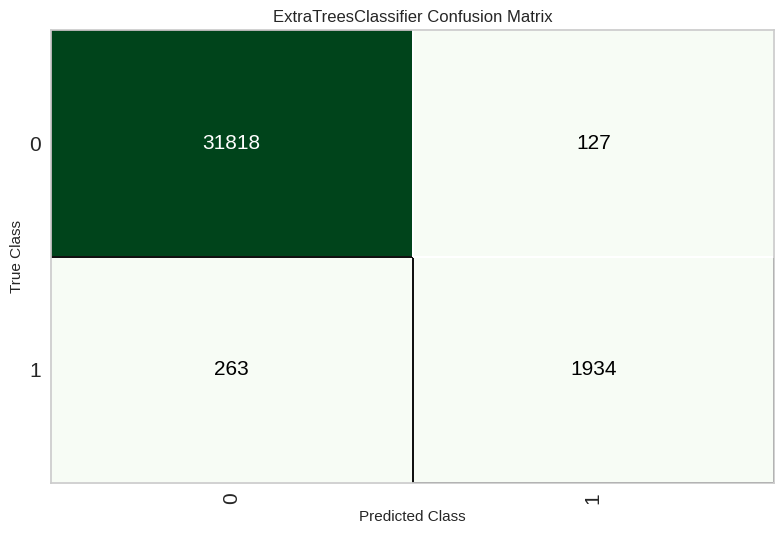

In [14]:
from pycaret.classification import plot_model

# Plot the confusion matrix for the best model
plot_model(best_model, plot='confusion_matrix')

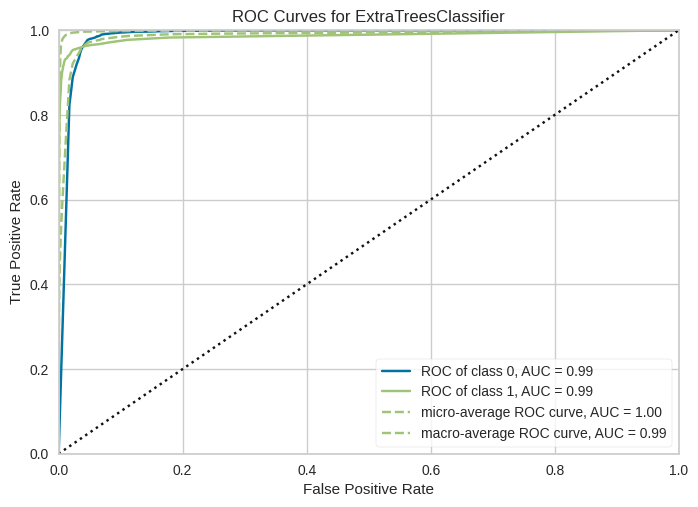

In [15]:
plot_model(best_model, plot='auc')

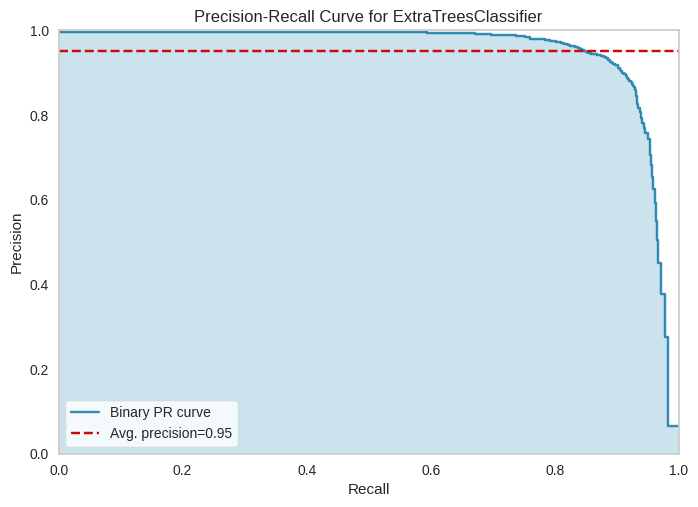

In [16]:
plot_model(best_model, plot='pr')

**Reasoning**:
After evaluating the model with the confusion matrix and AUC-ROC curve, the next step is to plot the feature importance to understand which features are most influential in the model's predictions.



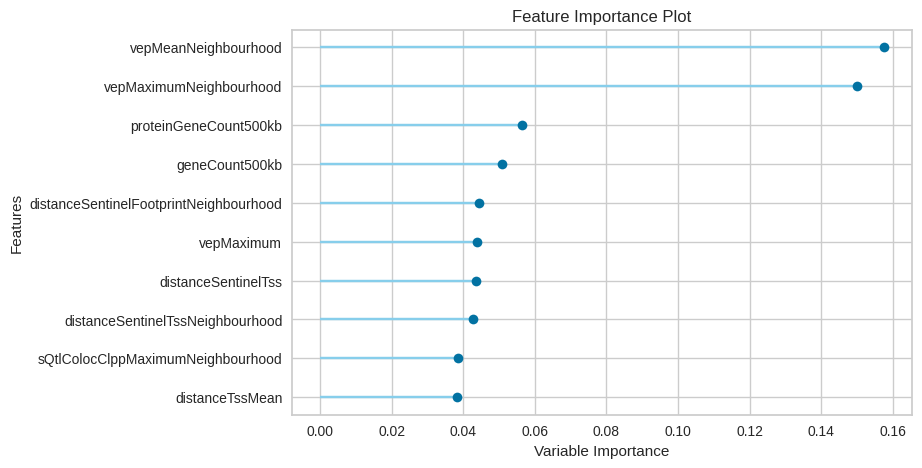

In [17]:
plot_model(best_model, plot='feature')

**Reasoning**:
Now that the model has been evaluated with various plots, the final step is to use the best model to make predictions on the unseen test data (`feature_matrix_test`) and evaluate its performance.



In [18]:
from pycaret.classification import predict_model

# Predict on the test data
predictions = predict_model(best_model, data=feature_matrix_test)

# Display the first few rows of the predictions
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9705,0.9361,0.6294,0.8583,0.7263,0.7111,0.7206


,studyLocusId,geneId,eQtlColocClppMaximum,pQtlColocClppMaximum,sQtlColocClppMaximum,eQtlColocH4Maximum,pQtlColocH4Maximum,sQtlColocH4Maximum,eQtlColocClppMaximumNeighbourhood,pQtlColocClppMaximumNeighbourhood,...,vepMaximum,vepMaximumNeighbourhood,vepMean,vepMeanNeighbourhood,geneCount500kb,proteinGeneCount500kb,credibleSetConfidence,goldStandardSet,prediction_label,prediction_score
0,1835842fc3a5adb764d87e05b8c9c18f,ENSG00000073060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.000000,0.0,14.0,5.0,0.75,1,0,0.92
1,3724d7a5e28cb0cf68188c38a48ca7ba,ENSG00000101670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.66,1.0,0.534712,1.0,21.0,6.0,0.75,1,1,0.85
2,60e4c6ad206052c37d78dd752b6d996f,ENSG00000163956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.000000,0.0,12.0,5.0,0.75,1,0,0.91
3,a0821282ee96626aa60408cc5e978c47,ENSG00000073060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.10,1.0,0.100000,1.0,15.0,5.0,0.75,1,1,0.72
4,f130919acafdaea6aeefd0e2d6fe1ea3,ENSG00000073060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.10,1.0,0.099041,1.0,15.0,5.0,0.75,1,1,0.72


In [19]:
from pycaret.classification import create_model

# Create an XGBoost model
xgboost_model = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9829,0.9791,0.8084,0.9164,0.8590,0.8500,0.8519
1,0.9822,0.9748,0.8088,0.9045,0.8540,0.8445,0.8460
Mean,0.9826,0.9770,0.8086,0.9104,0.8565,0.8473,0.8489
Std,0.0004,0.0022,0.0002,0.0060,0.0025,0.0027,0.0029


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

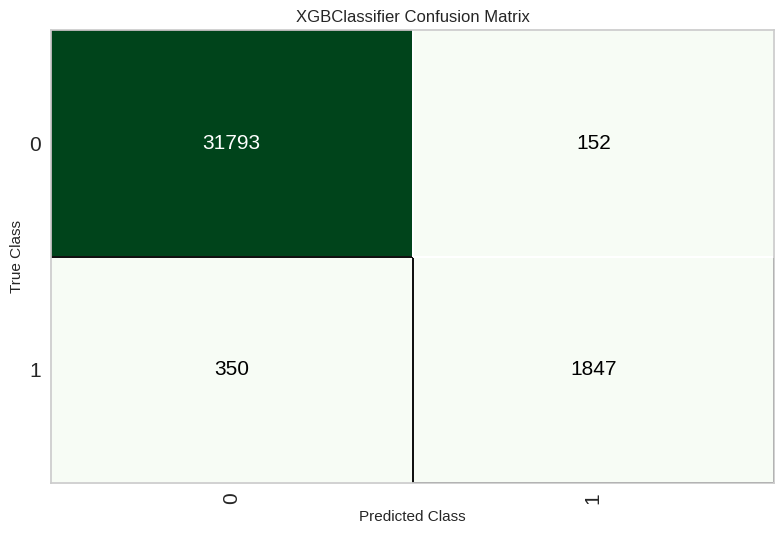

In [20]:
from pycaret.classification import plot_model

# Plot the confusion matrix for the tuned XGBoost model
plot_model(xgboost_model, plot='confusion_matrix')

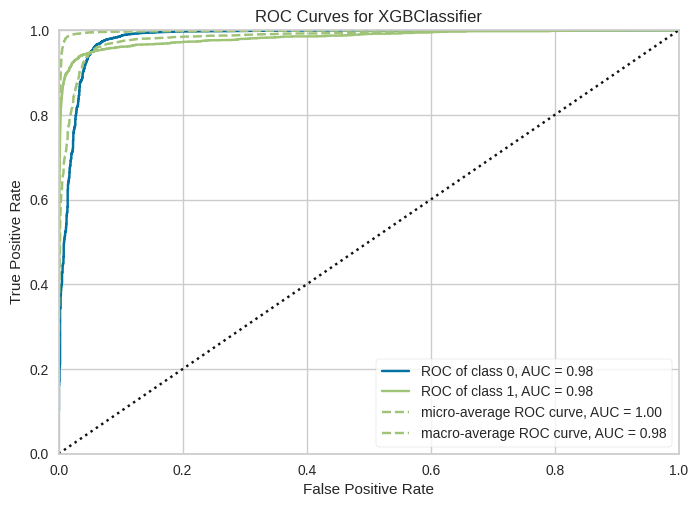

In [21]:
# Plot the AUC-ROC curve for the tuned XGBoost model
plot_model(xgboost_model, plot='auc')

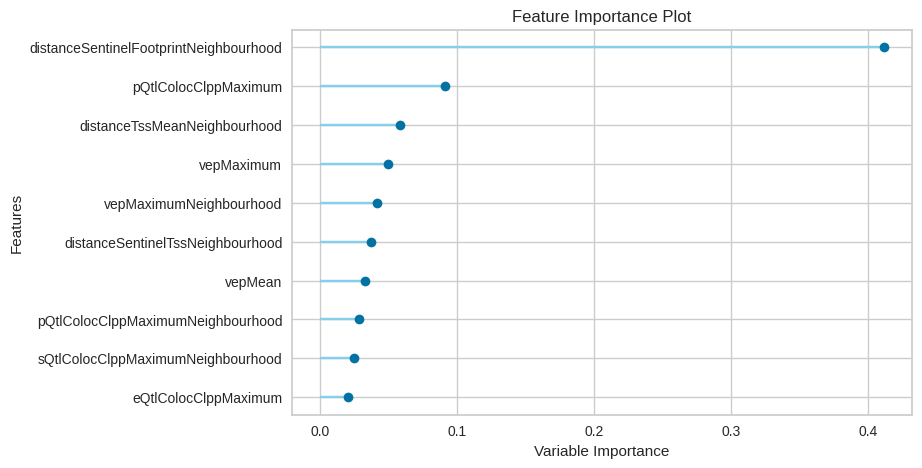

In [22]:
# Plot the feature importance for the tuned XGBoost model
plot_model(xgboost_model, plot='feature')

In [23]:
from pycaret.classification import predict_model

# Predict on the test data using the XGBoost model
xgboost_predictions = predict_model(xgboost_model, data=feature_matrix_test)

# Display the first few rows of the predictions
xgboost_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9624,0.9216,0.5845,0.7554,0.6591,0.6395,0.6454


,studyLocusId,geneId,eQtlColocClppMaximum,pQtlColocClppMaximum,sQtlColocClppMaximum,eQtlColocH4Maximum,pQtlColocH4Maximum,sQtlColocH4Maximum,eQtlColocClppMaximumNeighbourhood,pQtlColocClppMaximumNeighbourhood,...,vepMaximum,vepMaximumNeighbourhood,vepMean,vepMeanNeighbourhood,geneCount500kb,proteinGeneCount500kb,credibleSetConfidence,goldStandardSet,prediction_label,prediction_score
0,1835842fc3a5adb764d87e05b8c9c18f,ENSG00000073060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.000000,0.0,14.0,5.0,0.75,1,0,0.9802
1,3724d7a5e28cb0cf68188c38a48ca7ba,ENSG00000101670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.66,1.0,0.534712,1.0,21.0,6.0,0.75,1,1,0.9756
2,60e4c6ad206052c37d78dd752b6d996f,ENSG00000163956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.000000,0.0,12.0,5.0,0.75,1,0,0.9725
3,a0821282ee96626aa60408cc5e978c47,ENSG00000073060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.10,1.0,0.100000,1.0,15.0,5.0,0.75,1,1,0.6401
4,f130919acafdaea6aeefd0e2d6fe1ea3,ENSG00000073060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.10,1.0,0.099041,1.0,15.0,5.0,0.75,1,1,0.7940


In [24]:
from pycaret.classification import predict_model, pull
import pandas as pd

# Generate predictions and pull metrics for the best_model (Extra Trees)
predict_model(best_model, data=feature_matrix_test)
et_metrics = pull()
et_metrics.index = ['Extra Trees Classifier']

# Generate predictions and pull metrics for the tuned_xgboost model
predict_model(xgboost_model, data=feature_matrix_test)
xgb_metrics = pull()
xgb_metrics.index = ['XGBoost']

# Combine the metrics into a single DataFrame for comparison
comparison_df = pd.concat([et_metrics, xgb_metrics])

# Display the final comparison table
print("Side-by-side Comparison on Test Data")
display(comparison_df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9705,0.9361,0.6294,0.8583,0.7263,0.7111,0.7206


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9624,0.9216,0.5845,0.7554,0.6591,0.6395,0.6454


Side-by-side Comparison on Test Data


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Extra Trees Classifier,Extra Trees Classifier,0.9705,0.9361,0.6294,0.8583,0.7263,0.7111,0.7206
XGBoost,Extreme Gradient Boosting,0.9624,0.9216,0.5845,0.7554,0.6591,0.6395,0.6454


In [25]:
from pycaret.classification import tune_model

# Define the hyperparameters to tune. Each value must be in an iterable (like a list).
hyperparameters = {
    "max_depth": [5],
    "reg_alpha": [1],  # L1 regularization
    "reg_lambda": [1.0],  # L2 regularization
    "subsample": [0.8],
    "colsample_bytree": [0.8],
    "eta": [0.05],
    "min_child_weight": [10],
    "scale_pos_weight": [0.8],
}

# Tune the hyperparameters of the best model
# n_iter is set to 1 because we are only providing one combination of hyperparameters.
tuned_model = tune_model(xgboost_model, optimize='Prec.', custom_grid=hyperparameters)

# Display the tuned model's performance
print("\nTuned Model Performance:")
print(tuned_model)


print("\nHyperparameter tuning complete.")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9767,0.9635,0.7171,0.8997,0.7981,0.7859,0.7916
1,0.9762,0.9585,0.7183,0.8902,0.7951,0.7826,0.7877
Mean,0.9764,0.9610,0.7177,0.8949,0.7966,0.7842,0.7896
Std,0.0002,0.0025,0.0006,0.0047,0.0015,0.0016,0.0019


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 2 folds for each of 1 candidates, totalling 2 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).

Tuned Model Performance:
XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='gpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=-1, num_parallel_tree=None, ...)

Hyperparameter tuning complete.


In [26]:


# Predict on the test data using the XGBoost model
xgboosttune_predictions = predict_model(tuned_model, data=feature_matrix_test)

# Display the first few rows of the predictions
xgboosttune_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9624,0.9216,0.5845,0.7554,0.6591,0.6395,0.6454


,studyLocusId,geneId,eQtlColocClppMaximum,pQtlColocClppMaximum,sQtlColocClppMaximum,eQtlColocH4Maximum,pQtlColocH4Maximum,sQtlColocH4Maximum,eQtlColocClppMaximumNeighbourhood,pQtlColocClppMaximumNeighbourhood,...,vepMaximum,vepMaximumNeighbourhood,vepMean,vepMeanNeighbourhood,geneCount500kb,proteinGeneCount500kb,credibleSetConfidence,goldStandardSet,prediction_label,prediction_score
0,1835842fc3a5adb764d87e05b8c9c18f,ENSG00000073060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.000000,0.0,14.0,5.0,0.75,1,0,0.9802
1,3724d7a5e28cb0cf68188c38a48ca7ba,ENSG00000101670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.66,1.0,0.534712,1.0,21.0,6.0,0.75,1,1,0.9756
2,60e4c6ad206052c37d78dd752b6d996f,ENSG00000163956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.000000,0.0,12.0,5.0,0.75,1,0,0.9725
3,a0821282ee96626aa60408cc5e978c47,ENSG00000073060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.10,1.0,0.100000,1.0,15.0,5.0,0.75,1,1,0.6401
4,f130919acafdaea6aeefd0e2d6fe1ea3,ENSG00000073060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.10,1.0,0.099041,1.0,15.0,5.0,0.75,1,1,0.7940


In [27]:
#maunal baseline model

In [29]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

# 1. Assign naive column: only one gene gets 1 per studyLocusId (smallest distanceSentinelTss)
def mark_naive(df):
    idxmin = df['distanceSentinelTss'].idxmax()
    naives = np.zeros(len(df), dtype=int)
    naives[df.index.get_loc(idxmin)] = 1
    return pd.Series(naives, index=df.index)

feature_matrix_test['navie'] = feature_matrix_test.groupby('studyLocusId').apply(mark_naive).reset_index(level=0, drop=True)

# 2. Metrics for naive rule vs. actual gold standard
accuracy = accuracy_score(feature_matrix_test['goldStandardSet'], feature_matrix_test['navie'])
precision = precision_score(feature_matrix_test['goldStandardSet'], feature_matrix_test['navie'])
cmatrix = confusion_matrix(feature_matrix_test['goldStandardSet'], feature_matrix_test['navie'])

# 3. Print results
print(feature_matrix_test[['studyLocusId', 'geneId', 'goldStandardSet', 'navie']])
print(f"\nNaive rule accuracy: {accuracy:.4f}")
print(f"Naive rule precision: {precision:.4f}")
print("Confusion Matrix:\n", cmatrix)

                           studyLocusId           geneId  goldStandardSet  \
0      1835842fc3a5adb764d87e05b8c9c18f  ENSG00000073060                1   
1      3724d7a5e28cb0cf68188c38a48ca7ba  ENSG00000101670                1   
2      60e4c6ad206052c37d78dd752b6d996f  ENSG00000163956                1   
3      a0821282ee96626aa60408cc5e978c47  ENSG00000073060                1   
4      f130919acafdaea6aeefd0e2d6fe1ea3  ENSG00000073060                1   
...                                 ...              ...              ...   
18280  e87e905bf5c66bce5089d6a7162c5470  ENSG00000265681                0   
18281  e87e905bf5c66bce5089d6a7162c5470  ENSG00000167315                0   
18282  e87e905bf5c66bce5089d6a7162c5470  ENSG00000141627                0   
18283  e87e905bf5c66bce5089d6a7162c5470  ENSG00000167306                0   
18284  e87e905bf5c66bce5089d6a7162c5470  ENSG00000177576                0   

       navie  
0          0  
1          1  
2          0  
3          1  


In [31]:
feature_matrix_test.query("studyLocusId == '1835842fc3a5adb764d87e05b8c9c18f'")

,studyLocusId,geneId,goldStandardSet,eQtlColocClppMaximum,pQtlColocClppMaximum,sQtlColocClppMaximum,eQtlColocH4Maximum,pQtlColocH4Maximum,sQtlColocH4Maximum,eQtlColocClppMaximumNeighbourhood,...,distanceSentinelTss,distanceSentinelTssNeighbourhood,vepMaximum,vepMaximumNeighbourhood,vepMean,vepMeanNeighbourhood,geneCount500kb,proteinGeneCount500kb,credibleSetConfidence,navie
0,1835842fc3a5adb764d87e05b8c9c18f,ENSG00000073060,1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.993738,0.995480,0.0,0.0,0.0,0.0,14.0,5.0,0.75,0
1136,1835842fc3a5adb764d87e05b8c9c18f,ENSG00000196498,0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.915193,0.916797,0.0,0.0,0.0,0.0,14.0,5.0,0.75,0
1137,1835842fc3a5adb764d87e05b8c9c18f,ENSG00000139364,0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.936362,0.938003,0.0,0.0,0.0,0.0,14.0,5.0,0.75,0
1138,1835842fc3a5adb764d87e05b8c9c18f,ENSG00000184992,0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.984814,0.986539,0.0,0.0,0.0,0.0,14.0,5.0,0.75,0
1139,1835842fc3a5adb764d87e05b8c9c18f,ENSG00000150991,0,0.948741,0.0,0.948741,1.0,0.0,1.0,1.0,...,0.998251,1.000000,0.0,0.0,0.0,0.0,14.0,5.0,0.75,1
1140,1835842fc3a5adb764d87e05b8c9c18f,ENSG00000081760,0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.970131,0.971831,0.0,0.0,0.0,0.0,14.0,5.0,0.75,0
1141,1835842fc3a5adb764d87e05b8c9c18f,ENSG00000150990,0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.985649,0.987376,0.0,0.0,0.0,0.0,14.0,5.0,0.75,0
